# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

<img src="./IMG_3764.jpg" />

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

Yes there is only one unique solution for a and b in the context of a linear regression. This is because our loss function (SSE) takes the shape of a convex curve that approaches a minimum, and thus we find the values of a and b that minimize that curve.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

The answer would not be different, considering that the mean squared error also takes the shape of a convex curve that approaches a minimum. Thus it also yields a unique solution for a and b in the context of linear regression.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

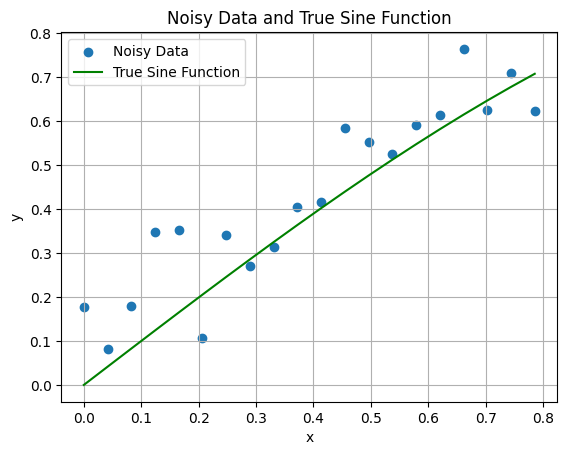

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
epsilon = 0.1

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    return np.sin(x) + noise

n_samples =20

# TODO: create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x,epsilon)

# TODO: create true function
x_pure = np.linspace(0, np.pi/4, n_samples)
y_pure = np.sin(x_pure)

# TODO: plot data, line
plt.scatter(x, y, label='Noisy Data')
plt.plot(x_pure, y_pure, label='True Sine Function', color='green')
plt.title('Noisy Data and True Sine Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

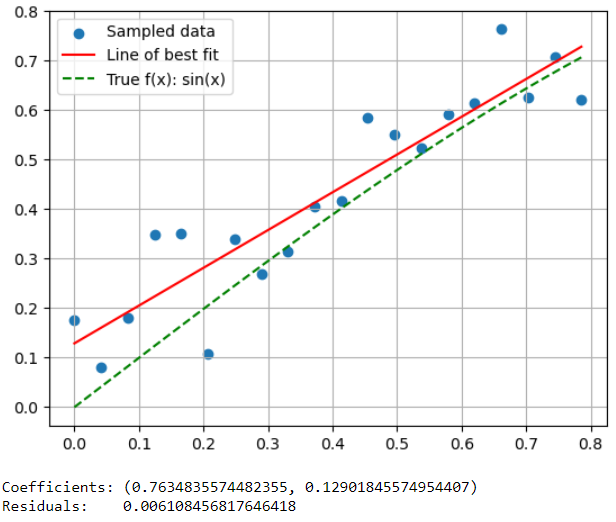

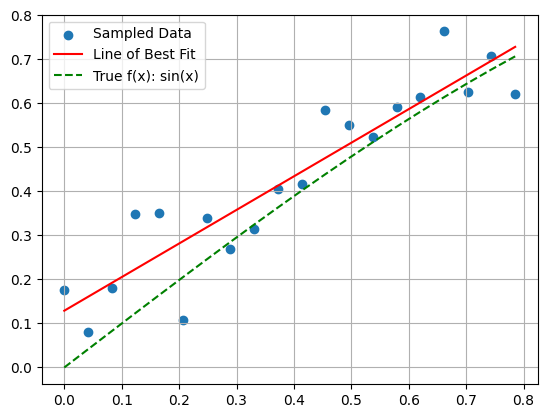

Coefficients: (0.7634835574482355, 0.12901845574954407)
Residuals:    0.12216913635292838


In [30]:
def compute_sos(y_true, y_pred):
    sos = np.sum((y_true - y_pred) ** 2)
    return sos

def lin_reg(xs, ys):
    b, a = np.polyfit(xs, ys, 1)
    y_pred = b * xs + a
    sos = compute_sos(ys, y_pred)
    res = np.min(sos)
    return a, b, res

# TODO: generate line of best fit
a, b, res = lin_reg(x, y)
y_best = b * x + a

# TODO: plot line of best fit, data, etc
plt.scatter(sample_space, y, label='Sampled Data')
plt.plot(sample_space, y_best, label='Line of Best Fit', color='red')
plt.plot(x_pure, y_pure, label='True f(x): sin(x)', color='green', linestyle='dashed')

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (b, a))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

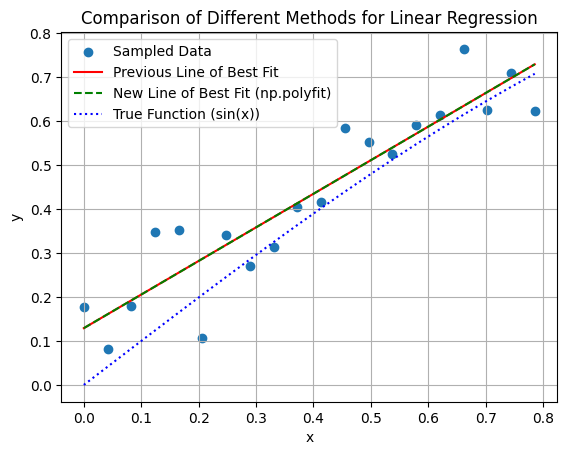

Coefficients (Previous Method):      (0.12901845574954407, 0.7634835574482355)
Residuals (Previous Method):         0.12216913635292838
Coefficients (np.polyfit):           (0.12901845574954407, 0.7634835574482355)
Residuals (np.polyfit):              0.12216913635292838


In [34]:

# Sample data
np.random.seed(0)
n_samples = 20
x_values = np.linspace(0, np.pi/4, n_samples)
epsilon = 0.1
y_true = np.sin(x_values)

# Add noise to create noisy data
noise = np.random.normal(0, epsilon, n_samples)
y_noisy = y_true + noise

# Previous line of best fit
a, b, res = lin_reg(x_values, y_noisy)

# Use np.polyfit to get coefficients and residuals
b_np, a_np = np.polyfit(x_values, y_noisy, 1)
y_best_np = b_np * x_values + a_np

# Plot everything
plt.scatter(x_values, y_noisy, label='Sampled Data')
plt.plot(x_values, y_best, label='Previous Line of Best Fit', color='red')
plt.plot(x_values, y_best_np, label='New Line of Best Fit (np.polyfit)', color='green', linestyle='dashed')
plt.plot(x_values, y_true, label='True Function (sin(x))', color='blue', linestyle='dotted')

# Make it pretty
plt.title('Comparison of Different Methods for Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print results
print("Coefficients (Previous Method):     ", (a, b))
print("Residuals (Previous Method):        ", res)
print("Coefficients (np.polyfit):          ", (a_np, b_np))
print("Residuals (np.polyfit):             ", np.sum((y_noisy - y_best_np) ** 2))

I obtain the same coefficients and residuals, which makes sense as the polyfit function is essentially using the same method as the method I used manually to find the line of best fit.

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

Coefficients:  (0.12087289781464736, 0.7908820924163728)
Train loss:    0.005735678377563854
Test loss:     0.00784698082438549


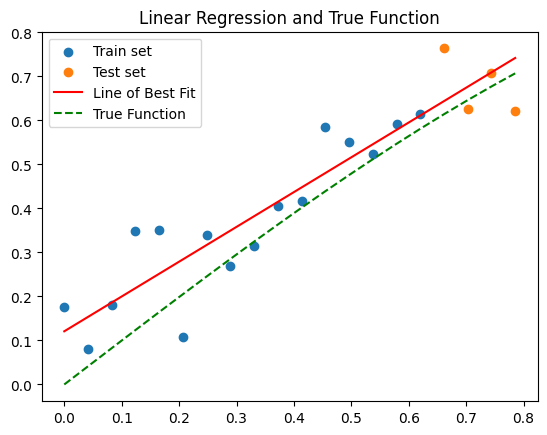

In [63]:
np.random.seed(0)
n_samples = 20
x_values = np.linspace(0, np.pi/4, n_samples)
epsilon = 0.1
y_true = np.sin(x_values)

# Add noise to create noisy data
noise = np.random.normal(0, epsilon, n_samples)
y_noisy = y_true + noise

def compute_mse(y_true, y_pred, a, b):
    squared_diff = (y_true - y_pred) ** 2
    mse = np.mean(squared_diff)
    return mse

# Split data into train and test sets
split_ratio = 0.8
n_train = int(split_ratio * n_samples)
x_train, x_test = x_values[:n_train], x_values[n_train:]
y_train, y_test = y_noisy[:n_train], y_noisy[n_train:]

# Perform linear regression on the training set
a, b, _ = lin_reg(x_train, y_train)

y_pred = b * x_values + a

# Plot train and test sets
plt.scatter(x_train, y_train, label="Train set")
plt.scatter(x_test, y_test, label="Test set")
plt.plot(x_values, y_pred, label="Line of Best Fit", color="red")
plt.plot(x_values, y_true, label="True Function", color="green", linestyle="dashed")
plt.title("Linear Regression and True Function")
plt.legend()

train_loss = compute_mse(y_train, b * x_train + a, a, b)
test_loss = compute_mse(y_test, b * x_test + a, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

The train loss should be better, and it is better in this case. This makes sense because essentially, our model is attempting to minimise the loss based on the training set that we give it.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

As we increase the sample size, and decrease the epsilon (therefore decreasing the noise), we find that both the training loss, and the test loss decrease (improve). This is because we are giving the model more data to work with and less noise to deal with, thus making it better at minimising the loss.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

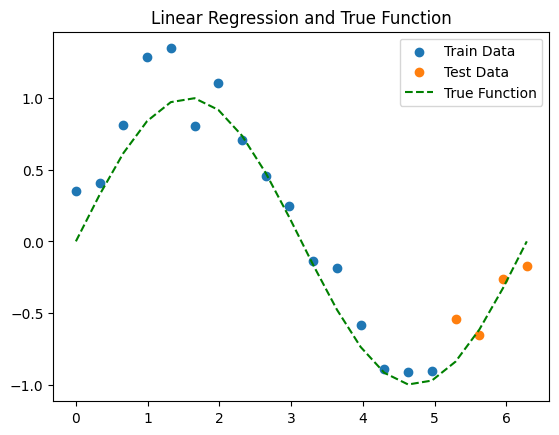

Train MSE: 12.201505613903715
Test MSE: 51.095445021756404


In [67]:
np.random.seed(0)
n_samples = 20
x_values = np.linspace(0, np.pi*2, n_samples)
epsilon = 0.2
y_true = np.sin(x_values)

noise = np.random.normal(0, epsilon, n_samples)
y_noisy = y_true + noise

split_ratio = 0.8
n_train = int(split_ratio * n_samples)
x_train, x_test = x_values[:n_train], x_values[n_train:]
y_train, y_test = y_noisy[:n_train], y_noisy[n_train:]

def compute_mse(y_true, y_pred):
    squared_diff = (y_true - y_pred) ** 2
    mse = np.mean(squared_diff)
    return mse


# Plot data, line of best fit, and true function
plt.scatter(x_train, y_train, label="Train Data")
plt.scatter(x_test, y_test, label="Test Data")
plt.plot(x_values, y_true, label="True Function", color="green", linestyle="--")
plt.title("Linear Regression and True Function")
plt.legend()
plt.show()

# Compute MSE for train and test sets
mse_train = compute_mse(y_train, y_pred_train)
mse_test = compute_mse(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

/var/folders/vg/tn5chcqj5t99h_v45nf7sw6c0000gn/T/ipykernel_8438/2146930577.py:26: RankWarning: Polyfit may be poorly conditioned
  coefficients_train = np.polyfit(x_train, y_train, deg=degree)
/var/folders/vg/tn5chcqj5t99h_v45nf7sw6c0000gn/T/ipykernel_8438/2146930577.py:26: RankWarning: Polyfit may be poorly conditioned
  coefficients_train = np.polyfit(x_train, y_train, deg=degree)
/var/folders/vg/tn5chcqj5t99h_v45nf7sw6c0000gn/T/ipykernel_8438/2146930577.py:26: RankWarning: Polyfit may be poorly conditioned
  coefficients_train = np.polyfit(x_train, y_train, deg=degree)
/var/folders/vg/tn5chcqj5t99h_v45nf7sw6c0000gn/T/ipykernel_8438/2146930577.py:26: RankWarning: Polyfit may be poorly conditioned
  coefficients_train = np.polyfit(x_train, y_train, deg=degree)
/var/folders/vg/tn5chcqj5t99h_v45nf7sw6c0000gn/T/ipykernel_8438/2146930577.py:26: RankWarning: Polyfit may be poorly conditioned
  coefficients_train = np.polyfit(x_train, y_train, deg=degree)


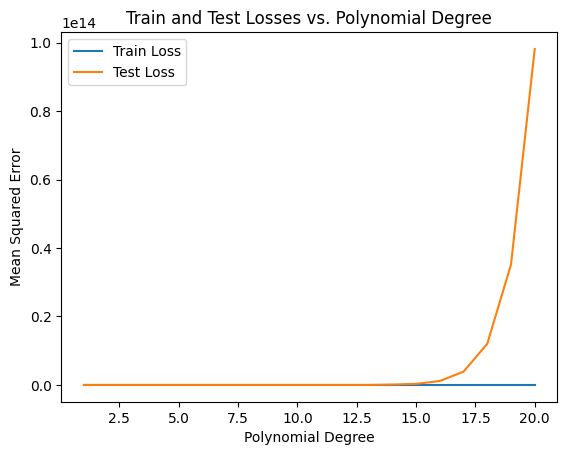

Best polynomial degree based on train loss: 20
Coefficients of best polynomial (train): [-1.70837620e-06  3.25272663e-05 -1.72171401e-04 -2.86154350e-04
  3.73866694e-03  9.42431959e-03 -7.91309675e-02 -3.20401505e-01
  1.73360943e+00  8.63288650e+00 -5.03185962e+01 -1.33076232e+02
  1.79443117e+03 -6.93220120e+03  1.49941856e+04 -2.02300670e+04
  1.72423740e+04 -8.91996183e+03  2.51393946e+03 -2.88321980e+02
  3.52810472e-01]

Best polynomial degree based on test loss: 3
Coefficients of best polynomial (test): [ 0.08500054 -0.79529589  1.62405799  0.18977344]


In [69]:
np.random.seed(0)
n_samples = 20
x_values = np.linspace(0, np.pi*2, n_samples)
epsilon = 0.2
y_true = np.sin(x_values)

noise = np.random.normal(0, epsilon, n_samples)
y_noisy = y_true + noise

split_ratio = 0.8
n_train = int(split_ratio * n_samples)
x_train, x_test = x_values[:n_train], x_values[n_train:]
y_train, y_test = y_noisy[:n_train], y_noisy[n_train:]

def compute_mse(y_true, y_pred):
    squared_diff = (y_true - y_pred) ** 2
    mse = np.mean(squared_diff)
    return mse


train_losses = []
test_losses = []
coefficients = []

for degree in range(1, 21):
    coefficients_train = np.polyfit(x_train, y_train, deg=degree)

    y_pred_train = np.polyval(coefficients_train, x_train)
    
    y_pred_test = np.polyval(coefficients_train, x_test)
    
    mse_train = compute_mse(y_train, y_pred_train)
    mse_test = compute_mse(y_test, y_pred_test)

    train_losses.append(mse_train)
    test_losses.append(mse_test)
    coefficients.append(coefficients_train)


degrees = range(1, 21)
plt.plot(degrees, train_losses, label='Train Loss')
plt.plot(degrees, test_losses, label='Test Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Losses vs. Polynomial Degree')
plt.legend()
plt.show()

best_degree_train = np.argmin(train_losses) + 1
best_degree_test = np.argmin(test_losses) + 1

print("Best polynomial degree based on train loss:", best_degree_train)
print("Coefficients of best polynomial (train):", coefficients[best_degree_train - 1])

print("\nBest polynomial degree based on test loss:", best_degree_test)
print("Coefficients of best polynomial (test):", coefficients[best_degree_test - 1])

**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

Perhaps this is a warning that indicates that the polynomial degree that we are using is unreasonably high

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

/var/folders/vg/tn5chcqj5t99h_v45nf7sw6c0000gn/T/ipykernel_8438/126318680.py:26: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_values, y_noisy, degree)


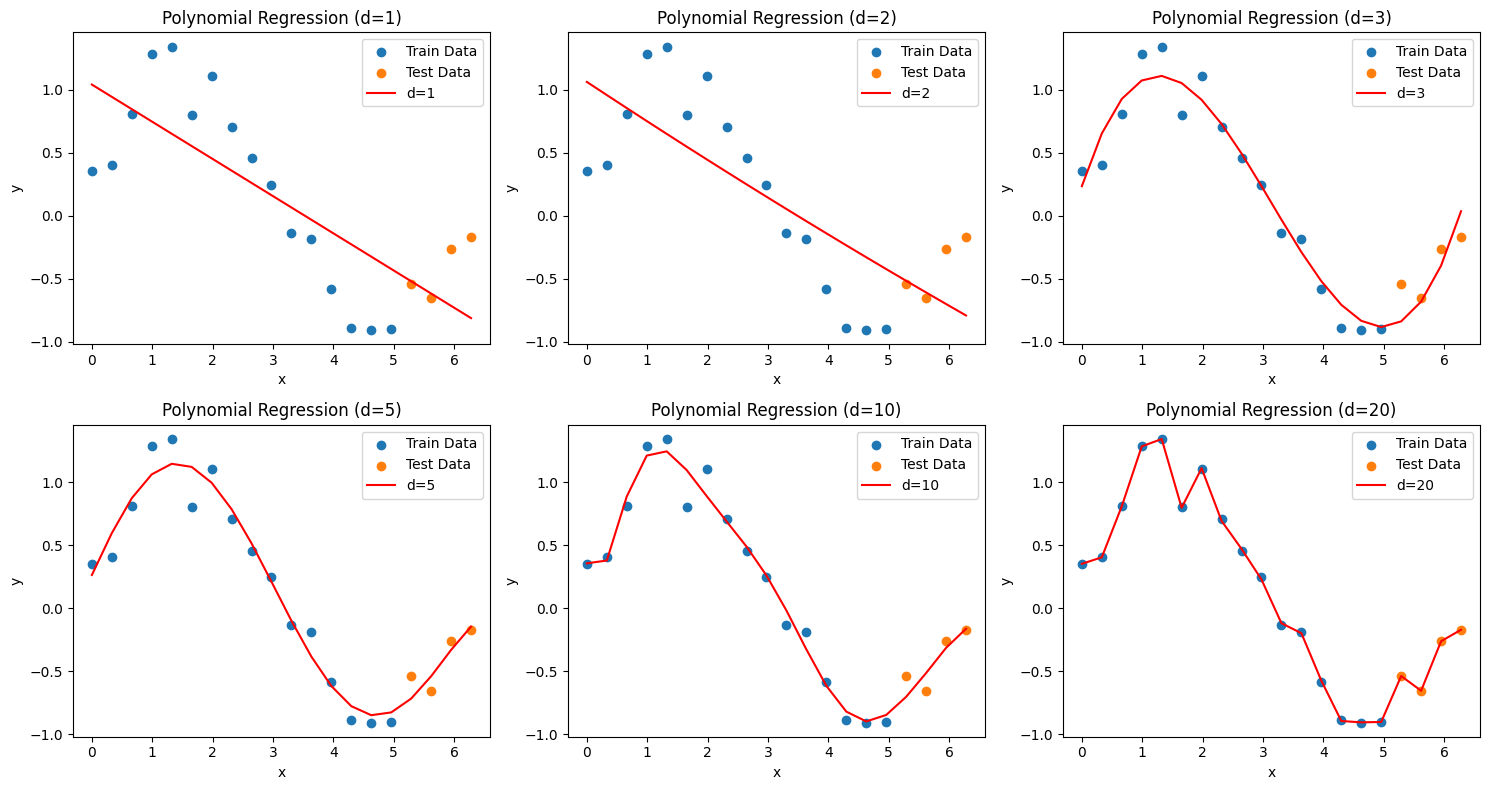

In [87]:
np.random.seed(0)
n_samples = 20
x_values = np.linspace(0, np.pi*2, n_samples)
epsilon = 0.2
y_true = np.sin(x_values)

noise = np.random.normal(0, epsilon, n_samples)
y_noisy = y_true + noise

degrees = [1, 2, 3, 5, 10, 20]

split_ratio = 0.8
n_train = int(split_ratio * n_samples)
x_train, x_test = x_values[:n_train], x_values[n_train:]
y_train, y_test = y_noisy[:n_train], y_noisy[n_train:]

num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

for i, degree in enumerate(degrees):
    coeffs = np.polyfit(x_values, y_noisy, degree)
    poly = np.poly1d(coeffs)
    
    y_pred = poly(x_values)
    
    axs[i].scatter(x_train, y_train, label="Train Data")
    axs[i].scatter(x_test, y_test, label="Test Data")
    
    axs[i].plot(x_values, y_pred, label=f"d={degree}", color='red')
    
    axs[i].set_title(f"Polynomial Regression (d={degree})")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].legend()

plt.tight_layout()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

/var/folders/vg/tn5chcqj5t99h_v45nf7sw6c0000gn/T/ipykernel_8438/1243936050.py:22: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, degree)


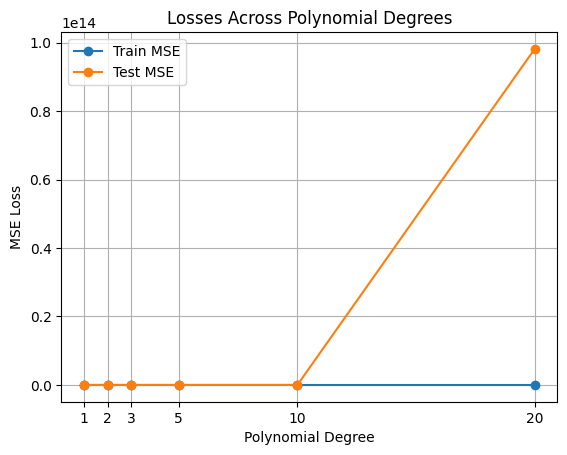

In [88]:
np.random.seed(0)
n_samples = 20
x_values = np.linspace(0, np.pi*2, n_samples)
epsilon = 0.2
y_true = np.sin(x_values)

noise = np.random.normal(0, epsilon, n_samples)
y_noisy = y_true + noise

split_ratio = 0.8
n_train = int(split_ratio * n_samples)
x_train, x_test = x_values[:n_train], x_values[n_train:]
y_train, y_test = y_noisy[:n_train], y_noisy[n_train:]

degrees = [1, 2, 3, 5, 10, 20,]

train_losses = []
test_losses = []

for degree in degrees:

    coeffs = np.polyfit(x_train, y_train, degree)
    poly = np.poly1d(coeffs)
    
    y_pred_train = poly(x_train)
    y_pred_test = poly(x_test)
    

    mse_train = np.mean((y_train - y_pred_train) ** 2)
    mse_test = np.mean((y_test - y_pred_test) ** 2)
    
    train_losses.append(mse_train)
    test_losses.append(mse_test)


plt.plot(degrees, train_losses, label="Train MSE", marker='o')
plt.plot(degrees, test_losses, label="Test MSE", marker='o')

plt.title("Losses Across Polynomial Degrees")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE Loss")
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

After polynomial degree 3 or 5, we see that the models start to overfit the data, as seen from the awkward shapes of the graphs. We can also see that after polynomial degree 10, the test loss increases tremendously, also indicating that degree 20 is too overfitting.

The model that fits best to the training data is the one with degree 20, which makes sense because we have 20 data points, and thus the model can match every single data point. As for the underlying function, a polynomial degree of 3 seems to be best.

It seems as though overfitting occurs at the same point as before, regardless of the number of training points.

No, because we may find that the training and test set differ entirely, and thus the model is optimized for the training set, and performs very badly for the test set.